# Notes: Building Machine Learning Systems with Python

![](https://images-na.ssl-images-amazon.com/images/I/716Dk4GnVGL.jpg)

## Getting Started with Python Machine Learning

teaching machines how to carry out tasks by themselves  
<br>
most of the time you will be doing one of these:
1. reading the data ad cleaning it
2. exploring and understanding the input data
3. analyzing how best to present the data to the learning algorithm
4. choosing the right model and learning algorithm
5. measuring the performance correctly

**feature engineering** refining subsets of the data for model training.  

### Numpy Intro

In [6]:
import numpy as np
a = np.array( [ 0,1,2,3,4,5 ] )
a.shape

(6,)

In [7]:
b = a.reshape( ( 3,2 ) )
print( b )
b.shape

[[0 1]
 [2 3]
 [4 5]]


(3, 2)

In [9]:
#numpy avoids copies wherever possible
b[ 1 ][ 0 ] = 77
print( 'b:\n', b )
print( 'a:\n', a )

b:
 [[ 0  1]
 [77  3]
 [ 4  5]]
a:
 [ 0  1 77  3  4  5]


In [11]:
#copies must be explicitly stated
c = a.reshape( ( 3,2 ) ).copy()
c[ 1 ][ 0 ] = 13
print( 'c:\n', c )
print( 'a:\n', a )

c:
 [[ 0  1]
 [13  3]
 [ 4  5]]
a:
 [ 0  1 77  3  4  5]


In [12]:
#numpy propagates operations elementwise
a* 2
a**2
#whereas with python lists:
lista = [ 0,1,2,3,4,5 ]
lista*2
lista**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [13]:
#numpy arrays can take numpy arrays as indeces:
a[ np.array( [ 2,3,4 ] ) ]

array([77,  3,  4])

In [16]:
print( a>4 )
print( a[ a>4 ] )
a[ a>4 ] = 4 #same as a.clip( 0,4 )
print( a )

[False False  True False False  True]
[77  5]
[0 1 4 3 4 4]


In [25]:
#comparing mupy ad python list runtimes
import timeit

normal_py_sec = timeit.timeit( 'sum(x*x for x in range( 1000 ) )', number = 10000 )
naive_np_sec = timeit.timeit( \
                            'sum(na*na)', \
                            setup = "import numpy as np; na=np.arange(1000)", \
                            number = 10000 )
good_np_sec = timeit.timeit( \
                           'na.dot(na)', \
                           setup = "import numpy as np; na=np.arange(1000)", \
                           number = 10000 )

print( 'Normal Python List: %f sec'%normal_py_sec )
print( 'Naiv Numpy: %f sec'%naive_np_sec )
print( 'Good Numpy: %f sec'%good_np_sec )

Normal Python List: 0.737082 sec
Naiv Numpy: 1.742191 sec
Good Numpy: 0.014320 sec


In every algorithm we are about to implement, we should always look at how we can move loops over individual elements from Python to some of the highly optimized NumPy or SciPy extension functions.

In [26]:
#limitations: NumPy arrays can only hold one data type and will do strange things if given more than one
a = np.array( [1,2,3 ] )
print( a.dtype )
b = np.array( [ 1, 'stringy' ] )
print( b.dtype )
c = np.array( [ 1, 'stringy', set( [ 1,2,3 ] ) ] )
print( c.dtype )

int64
<U21
object


### a tiny machine learning application

In [28]:
import scipy as sp
webdata_addy = 'https://raw.githubusercontent.com/PacktPublishing/Building-Machine-Learning-Systems-with-Python-Third-edition/master/Chapter01/data/web_traffic.tsv'
data = sp.genfromtxt( webdata_addy, delimiter='\t')
data.shape

/home/bonzilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  This is separate from the ipykernel package so we can avoid doing imports until


(743, 2)

In [29]:
#python works more efficiently along vectors
x = data[ :,0 ]
y = data[ :,1 ]

#how many missing values are there?
xnan = sp.sum( sp.isnan( x ) )
ynan = sp.sum( sp.isnan( y ) )
print( 'X has %f missing values'%xnan )
print( 'Y has %f missing values'%ynan )

X has 0.000000 missing values
Y has 8.000000 missing values


/home/bonzilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  
/home/bonzilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  
/home/bonzilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  import sys
/home/bonzilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  import sys


In [30]:
import numpy as np
#how many missing values are there?
xnan = np.sum( np.isnan( x ) )
ynan = np.sum( np.isnan( y ) )
print( 'X has %f missing values'%xnan )
print( 'Y has %f missing values'%ynan )

X has 0.000000 missing values
Y has 8.000000 missing values


In [31]:
#remove the rocords with missing y values 
x = x[ ~np.isnan( y ) ]
y = y[ ~np.isnan( y ) ]
print( x.shape )
print( data.shape )

(735,)
(743, 2)


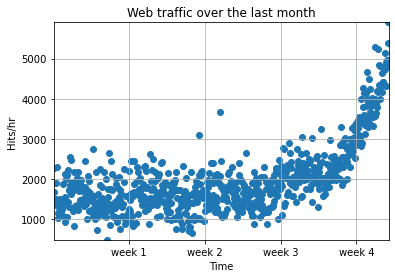

In [32]:
import matplotlib.pyplot as plt
plt.scatter( x,y )
plt.title( 'Web traffic over the last month' )
plt.xlabel( 'Time' )
plt.ylabel( 'Hits/hr' )
plt.xticks( [ w*7*24 for w in range( 10 ) ], \
          [ 'week %i'%w for w in range( 10 ) ] )
plt.autoscale( tight=True )
plt.grid()
plt.show()

Use this data to answer the question: How long will the server handle incoming web traffc?
* find the 'real' model behind the noisy data points
* use the model to extrapolate into the future to find the point in time where the server's infrastructure has to be extended

In [33]:
def error( f,x,y ):
    return np.sum( ( f( x )-y )**2 )

In [37]:
#model the data with a simple linear regression
fp1, residuals, rank, sv, rcond = np.polyfit( x,y,1,full=True )
print( "Model parameters: %s"% fp1 )
print( residuals )
f1 = sp.poly1d( fp1 )
print( error( f1, x, y ) )

Model parameters: [  2.58462016 996.50674246]
[3.19531507e+08]
319531507.0208318


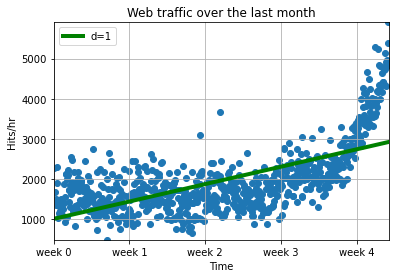

In [41]:
#plotting our linear fit
plt.scatter( x,y )
plt.title( 'Web traffic over the last month' )
plt.xlabel( 'Time' )
plt.ylabel( 'Hits/hr' )
plt.xticks( [ w*7*24 for w in range( 10 ) ], \
          [ 'week %i'%w for w in range( 10 ) ] )
plt.autoscale( tight=True )
fx = np.linspace( 0, x[-1], 1000)
plt.plot( fx, f1( fx ), linewidth=4, color='g' )
plt.legend( ['d=%i'% f1.order ], loc='upper left' )
plt.grid()
plt.show()

Although the linear fit is clearly not the one we would use, it will serve as a baseline to measure future models by.

In [50]:
#now to fit a 2nd degree polynomial
f2p = np.polyfit( x,y,2 )
f2 = sp.poly1d( f2p )
print( error( f2,x,y ) )

f3p = np.polyfit( x,y,3 )
f3 = sp.poly1d( f3p )
print( error( f3,x,y ) )

f10p = np.polyfit( x,y,10 )
f10 = sp.poly1d( f10p )
print( error( f10,x,y ) )

f50p = np.polyfit( x,y,50 )
f50 = sp.poly1d( f50p )
print( error( f50,x,y ) )

181347660.7576103
140576460.87968162
123426935.75183958
110828340.84603086


/home/bonzilla/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


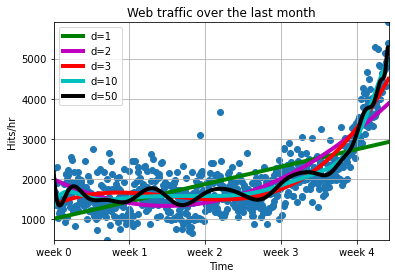

In [51]:
#plotting
plt.scatter( x,y )
plt.title( 'Web traffic over the last month' )
plt.xlabel( 'Time' )
plt.ylabel( 'Hits/hr' )
plt.xticks( [ w*7*24 for w in range( 10 ) ], \
          [ 'week %i'%w for w in range( 10 ) ] )
plt.autoscale( tight=True )
fx = np.linspace( 0, x[-1], 1000)
plt.plot( fx, f1( fx ), linewidth=4, color='g' )
plt.plot( fx, f2( fx ), linewidth=4, color='m' )
plt.plot( fx, f3( fx ), linewidth=4, color='r' )
plt.plot( fx, f10( fx ), linewidth=4, color='c' )
plt.plot( fx, f50( fx ), linewidth=4, color='k' )
plt.legend( ['d=%i'% f1.order, 'd=%i'% f2.order, 'd=%i'% f3.order, 'd=%i'% f10.order, 'd=%i'% f50.order ], loc='upper left' )
plt.grid()
plt.show()

models that are too simple or too complex do not capture the behavior of the data very well.  
we have a few choices:
1. select one of the fitted polynomials
2. switch to a different and more complex model class (e.g splines)
3. think differently about the data and start over

In [59]:
#try an approach where we seperate our data and model two different linear fits
inflection = int( 3.5*7*24 )
xa = x[ :inflection ]
xb = x[ inflection: ]
ya = y[ :inflection ]
yb = y[ inflection: ]

fa = sp.poly1d( np.polyfit( xa,ya,1 ) )
fa_error = error( fa, xa, ya )
fb = sp.poly1d( np.polyfit( xb,yb,1 ) )
fb_error = error( fb, xb, yb )

print( 'Error inflection = %f'%( fa_error + fb_error))

Error inflection = 134390576.312955


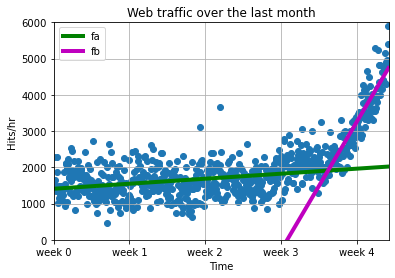

In [61]:
#plotting
plt.scatter( x,y )
plt.title( 'Web traffic over the last month' )
plt.xlabel( 'Time' )
plt.ylabel( 'Hits/hr' )
plt.xticks( [ w*7*24 for w in range( 10 ) ], \
          [ 'week %i'%w for w in range( 10 ) ] )
plt.autoscale( tight=True )
fx = np.linspace( 0, x[-1], 1000)
plt.plot( fx, fa( fx ), linewidth=4, color='g' )
plt.plot( fx, fb( fx ), linewidth=4, color='m' )
plt.legend( ['fa','fb'], loc='upper left' )
plt.ylim( [0,6000])
plt.grid()
plt.show()

In [71]:
#how do the models behave if they are only fit for the last week of data?
f2b = sp.poly1d( np.polyfit( xb,yb,2 ) )
f2b_error = error( f2b, xb, yb )
f3b = sp.poly1d( np.polyfit( xb,yb,3 ) )
f3b_error = error( f3b, xb, yb )
f10b = sp.poly1d( np.polyfit( xb,yb,10 ) )
f10b_error = error( f10b, xb, yb )

print( 'Error d=%f'%f2b_error )
print( 'Error d=%f'%f3b_error )
print( 'Error d=%f'%f10b_error )


Error d=19764355.660566
Error d=19762196.404684
Error d=18942545.360715


/home/bonzilla/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


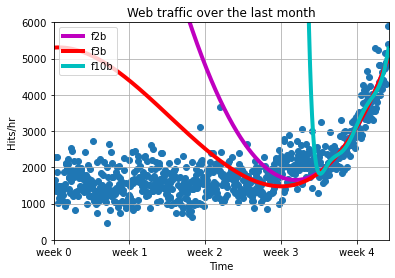

In [72]:
#plotting
plt.scatter( x,y )
plt.title( 'Web traffic over the last month' )
plt.xlabel( 'Time' )
plt.ylabel( 'Hits/hr' )
plt.xticks( [ w*7*24 for w in range( 10 ) ], \
          [ 'week %i'%w for w in range( 10 ) ] )
plt.autoscale( tight=True )
fx = np.linspace( 0, x[-1], 1000)
plt.plot( fx, f2b( fx ), linewidth=4, color='m' )
plt.plot( fx, f3b( fx ), linewidth=4, color='r' )
plt.plot( fx, f10b( fx ), linewidth=4, color='c' )
plt.legend( ['f2b','f3b','f10b' ], loc='upper left' )
plt.ylim( [0,6000])
plt.grid()
plt.show()

In [75]:
from scipy.optimize import fsolve
reached_max = fsolve( f2b-100000,800)/(7*24)
print( "100,000hits/hr expected in week %f"%reached_max[0] )

100,000hits/hr expected in week 9.836972


In [73]:
print( f2b )

         2
0.07895 x - 84.71 x + 2.437e+04


### training and testing

partition the data set: use one chunk to train the model and another to test and get a better estimate of the error.